# Genetic Algorithm 
Reference : https://towardsdatascience.com/evolution-of-a-salesman-a-complete-genetic-algorithm-tutorial-for-python-6fe5d2b3ca35

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, random, operator, time

In [2]:
#City class 구성
class City :
    def __init__(self,x,y):
        self.x = x
        self.y = y
    
    def distance(self,city):
        Dis = np.sqrt((self.x-city.x)**2+(self.y-city.y)**2)
        return Dis
    
    def __repr__(self):
        return '('+str(self.x)+','+str(self.y)+')'
    

In [3]:
#Fitness
class Fitness :
    def __init__(self,route):
        self.route = route
        self.distance =0
        self.fitness = 0
        
        
        
    def routeDistance(self):
        pathdistance = 0
        if self.distance == 0:
            for i in range(0,len(self.route)):
                if i+1 < len(self.route):
                    fromCity = self.route[i]
                    toCity = self.route[i+1]
                    pathdistance += fromCity.distance(toCity)
                else :
                    fromCity = self.route[len(self.route)-1]
                    toCity = self.route[0]
                    pathdistance += fromCity.distance(toCity)
        return pathdistance
    
    def routeFitness(self):
        routefitness = 0
        routedistance = self.routeDistance()
        if self.fitness==0:
            routefitness = 1/float(routedistance)
            
        return routefitness
              

In [4]:
route1 = []

In [5]:
for i in range(10):
    route1.append(City(random.randint(0,100),random.randint(0,100)))

In [6]:
route1

[(54,74),
 (79,80),
 (71,72),
 (73,27),
 (86,41),
 (68,69),
 (24,13),
 (33,1),
 (61,27),
 (53,71)]

In [7]:
fitness1 = Fitness(route1).routeFitness()

In [8]:
fitness1

0.003259758229712894

In [9]:
#createRoute : CityList에서 구성된 랜덤샘플로 route구성
def createRoute(cityList):
    route = random.sample(cityList,len(cityList))
    return route

In [10]:
route1

[(54,74),
 (79,80),
 (71,72),
 (73,27),
 (86,41),
 (68,69),
 (24,13),
 (33,1),
 (61,27),
 (53,71)]

In [11]:
citylist1=route1

In [12]:
citylist1

[(54,74),
 (79,80),
 (71,72),
 (73,27),
 (86,41),
 (68,69),
 (24,13),
 (33,1),
 (61,27),
 (53,71)]

In [13]:
createRoute(citylist1)

[(68,69),
 (54,74),
 (53,71),
 (61,27),
 (73,27),
 (24,13),
 (33,1),
 (86,41),
 (71,72),
 (79,80)]

In [14]:
#cityList,popNum입력받아 popNum개의 population 형성
def initialPopulation(cityList,popNum):
    population = []
    for i in range(popNum):
        population.append(createRoute(cityList))
    return population

In [15]:
a = initialPopulation(citylist1,5)

In [16]:
a

[[(68,69),
  (33,1),
  (71,72),
  (54,74),
  (86,41),
  (53,71),
  (24,13),
  (73,27),
  (79,80),
  (61,27)],
 [(73,27),
  (53,71),
  (68,69),
  (54,74),
  (71,72),
  (86,41),
  (79,80),
  (33,1),
  (24,13),
  (61,27)],
 [(86,41),
  (53,71),
  (54,74),
  (68,69),
  (73,27),
  (24,13),
  (79,80),
  (71,72),
  (33,1),
  (61,27)],
 [(79,80),
  (61,27),
  (33,1),
  (24,13),
  (54,74),
  (68,69),
  (53,71),
  (73,27),
  (71,72),
  (86,41)],
 [(61,27),
  (68,69),
  (24,13),
  (86,41),
  (71,72),
  (73,27),
  (53,71),
  (79,80),
  (54,74),
  (33,1)]]

In [17]:
a

[[(68,69),
  (33,1),
  (71,72),
  (54,74),
  (86,41),
  (53,71),
  (24,13),
  (73,27),
  (79,80),
  (61,27)],
 [(73,27),
  (53,71),
  (68,69),
  (54,74),
  (71,72),
  (86,41),
  (79,80),
  (33,1),
  (24,13),
  (61,27)],
 [(86,41),
  (53,71),
  (54,74),
  (68,69),
  (73,27),
  (24,13),
  (79,80),
  (71,72),
  (33,1),
  (61,27)],
 [(79,80),
  (61,27),
  (33,1),
  (24,13),
  (54,74),
  (68,69),
  (53,71),
  (73,27),
  (71,72),
  (86,41)],
 [(61,27),
  (68,69),
  (24,13),
  (86,41),
  (71,72),
  (73,27),
  (53,71),
  (79,80),
  (54,74),
  (33,1)]]

In [18]:
poprank = {}
for i in range(len(a)):
    fitness = Fitness(a[i]).routeFitness()
    poprank[i]=fitness



In [19]:
poprank

{0: 0.0018783261308371584,
 1: 0.0030535607332139772,
 2: 0.002492066036252214,
 3: 0.0026695277657157418,
 4: 0.0020962792061988405}

In [20]:

routerank = sorted(poprank.items(),key = operator.itemgetter(1),reverse=True)


In [21]:
routerank

[(1, 0.0030535607332139772),
 (3, 0.0026695277657157418),
 (2, 0.002492066036252214),
 (4, 0.0020962792061988405),
 (0, 0.0018783261308371584)]

In [22]:
df = pd.DataFrame(routerank,columns=['Index','Fitness'])

In [23]:
df

,Index,Fitness
0,1,0.003054
1,3,0.002670
2,2,0.002492
3,4,0.002096
4,0,0.001878


In [25]:
df['Rank']=df.index+1

In [26]:

df['Rank']=df['Rank'].values[::-1]

In [27]:
df

,Index,Fitness,Rank
0,1,0.003054,5
1,3,0.002670,4
2,2,0.002492,3
3,4,0.002096,2
4,0,0.001878,1


In [28]:
len(df)

5

In [29]:
df['Pressure']=df['Rank']/(len(df)*(len(df)+1)/2)*100
df['Cumsum']=df['Pressure'].cumsum()

In [30]:
df

,Index,Fitness,Rank,Pressure,Cumsum
0,1,0.003054,5,33.333333,33.333333
1,3,0.002670,4,26.666667,60.000000
2,2,0.002492,3,20.000000,80.000000
3,4,0.002096,2,13.333333,93.333333
4,0,0.001878,1,6.666667,100.000000


In [31]:
#rankRoutes로 population의 route중 fitness좋은것부터
#순서대로 (index,fitness)형태로 출력
def rankRoutes(population):
    poprank = {}
    for i in range(len(population)):
        fitness = Fitness(population[i]).routeFitness()
        poprank[i]=fitness
    return sorted(poprank.items(),key = operator.itemgetter(1),reverse=True)


In [32]:
rankRoutes(a)

[(1, 0.0030535607332139772),
 (3, 0.0026695277657157418),
 (2, 0.002492066036252214),
 (4, 0.0020962792061988405),
 (0, 0.0018783261308371584)]

In [33]:
#roulette wheel이용해서 selection. population length만큼 선택하기.
#rank selection
def selection(popRank):
    selected = []
    df = pd.DataFrame(popRank,columns=['Index','Fitness'])
    df['Rank']=df.index+1
    df['Rank']=df['Rank'].values[::-1]
    df['Pressure']=df['Rank']/(len(df)*(len(df)+1)/2)*100
    df['Cumsum']=df['Pressure'].cumsum()
    for i in range(len(popRank)):
        pick = random.random()*100
        for k in range(len(popRank)):
            if pick < df.iloc[k,4]:
                selected.append(popRank[k])
                break
    return selected
                
        
    

In [34]:
df.iloc[1,3]

26.666666666666668

In [35]:
df

,Index,Fitness,Rank,Pressure,Cumsum
0,1,0.003054,5,33.333333,33.333333
1,3,0.002670,4,26.666667,60.000000
2,2,0.002492,3,20.000000,80.000000
3,4,0.002096,2,13.333333,93.333333
4,0,0.001878,1,6.666667,100.000000


In [36]:
routerank

[(1, 0.0030535607332139772),
 (3, 0.0026695277657157418),
 (2, 0.002492066036252214),
 (4, 0.0020962792061988405),
 (0, 0.0018783261308371584)]

In [37]:
selc= selection(routerank)

In [38]:
selc

[(1, 0.0030535607332139772),
 (3, 0.0026695277657157418),
 (3, 0.0026695277657157418),
 (3, 0.0026695277657157418),
 (3, 0.0026695277657157418)]

In [39]:
selc[1][0]

3

In [40]:
#selection 결과 바탕으로 matingpool형성
def matingpool(selected,population):
    #population에서 룰렛휠로 selected된 route들로 mating pool 형성
    index = []
    for i in range(len(selected)):
        index.append(selected[i][0])
    pool = []
    for i in range(len(index)):
        pool.append(population[index[i]])
    return pool    
    
    
           

In [41]:
matingpool(selc,a)

[[(73,27),
  (53,71),
  (68,69),
  (54,74),
  (71,72),
  (86,41),
  (79,80),
  (33,1),
  (24,13),
  (61,27)],
 [(79,80),
  (61,27),
  (33,1),
  (24,13),
  (54,74),
  (68,69),
  (53,71),
  (73,27),
  (71,72),
  (86,41)],
 [(79,80),
  (61,27),
  (33,1),
  (24,13),
  (54,74),
  (68,69),
  (53,71),
  (73,27),
  (71,72),
  (86,41)],
 [(79,80),
  (61,27),
  (33,1),
  (24,13),
  (54,74),
  (68,69),
  (53,71),
  (73,27),
  (71,72),
  (86,41)],
 [(79,80),
  (61,27),
  (33,1),
  (24,13),
  (54,74),
  (68,69),
  (53,71),
  (73,27),
  (71,72),
  (86,41)]]

In [42]:
a

[[(68,69),
  (33,1),
  (71,72),
  (54,74),
  (86,41),
  (53,71),
  (24,13),
  (73,27),
  (79,80),
  (61,27)],
 [(73,27),
  (53,71),
  (68,69),
  (54,74),
  (71,72),
  (86,41),
  (79,80),
  (33,1),
  (24,13),
  (61,27)],
 [(86,41),
  (53,71),
  (54,74),
  (68,69),
  (73,27),
  (24,13),
  (79,80),
  (71,72),
  (33,1),
  (61,27)],
 [(79,80),
  (61,27),
  (33,1),
  (24,13),
  (54,74),
  (68,69),
  (53,71),
  (73,27),
  (71,72),
  (86,41)],
 [(61,27),
  (68,69),
  (24,13),
  (86,41),
  (71,72),
  (73,27),
  (53,71),
  (79,80),
  (54,74),
  (33,1)]]

In [43]:
#breed...
parent1 = random.sample(a,1)
parent2 = random.sample(a,1)
abs1 = random.randint(0,len(parent1[0]))
abs2 = random.randint(0,len(parent2[0]))
child1 =[]
for i in range(min(abs1,abs2),max(abs1,abs2)):
    child1.append(parent1[0][i])
child2 = [val for val in parent2[0] if val not in child1]
Child = child1+child2

In [44]:
child1

[(68,69), (54,74)]

In [45]:
parent2

[[(61,27),
  (68,69),
  (24,13),
  (86,41),
  (71,72),
  (73,27),
  (53,71),
  (79,80),
  (54,74),
  (33,1)]]

In [46]:
child2

[(61,27), (24,13), (86,41), (71,72), (73,27), (53,71), (79,80), (33,1)]

In [47]:
parent1

[[(73,27),
  (53,71),
  (68,69),
  (54,74),
  (71,72),
  (86,41),
  (79,80),
  (33,1),
  (24,13),
  (61,27)]]

In [48]:
def breed(parent1,parent2):
    child1 = []
    abs1 = random.randint(0,len(parent1))
    abs2 = random.randint(0,len(parent2))
    child1 = []
    for i in range(min(abs1,abs2),max(abs1,abs2)):
        child1.append(parent1[i])
    child2 = [val for val in parent2 if val not in child1]
    Child = child1+child2
    return Child

In [49]:
pool = matingpool(selc,a)

In [50]:
pool

[[(73,27),
  (53,71),
  (68,69),
  (54,74),
  (71,72),
  (86,41),
  (79,80),
  (33,1),
  (24,13),
  (61,27)],
 [(79,80),
  (61,27),
  (33,1),
  (24,13),
  (54,74),
  (68,69),
  (53,71),
  (73,27),
  (71,72),
  (86,41)],
 [(79,80),
  (61,27),
  (33,1),
  (24,13),
  (54,74),
  (68,69),
  (53,71),
  (73,27),
  (71,72),
  (86,41)],
 [(79,80),
  (61,27),
  (33,1),
  (24,13),
  (54,74),
  (68,69),
  (53,71),
  (73,27),
  (71,72),
  (86,41)],
 [(79,80),
  (61,27),
  (33,1),
  (24,13),
  (54,74),
  (68,69),
  (53,71),
  (73,27),
  (71,72),
  (86,41)]]

In [51]:
pool[1]

[(79,80),
 (61,27),
 (33,1),
 (24,13),
 (54,74),
 (68,69),
 (53,71),
 (73,27),
 (71,72),
 (86,41)]

In [52]:
random.randint(0,3)

3

In [53]:
def breedpopulation(pool):
    breedpop = []
    for i in range(len(pool)):
        parent1 = pool[int(random.random()*len(pool))]
        parent2 = pool[int(random.random()*len(pool))]
        breedpop.append(breed(parent1,parent2))
    return breedpop
#pool에서 랜덤한 부모 2명 추출-> breed
#pool length(=popnum)만큼 breedpopulation(자손pop)생성

In [54]:
brpop = breedpopulation(pool)

In [55]:
def mutate(breedroute):
    index1 = int(random.random()*len(breedroute))
    index2 = int(random.random()*len(breedroute))
    change1 = breedroute[index1]
    change2 = breedroute[index2]
    breedroute[index1] = change2
    breedroute[index2] = change1
    return breedroute
            
        
    

In [56]:
def mutatepopulation(breedpop,mutationrate):
    for i in range(len(breedpop)):
        rate = random.random()
        if rate < mutationrate:
            mutate(breedpop[i])
        
    return breedpop

In [57]:
brpop

[[(73,27),
  (53,71),
  (68,69),
  (54,74),
  (71,72),
  (86,41),
  (79,80),
  (33,1),
  (24,13),
  (61,27)],
 [(86,41),
  (79,80),
  (33,1),
  (24,13),
  (61,27),
  (54,74),
  (68,69),
  (53,71),
  (73,27),
  (71,72)],
 [(33,1),
  (24,13),
  (54,74),
  (79,80),
  (61,27),
  (68,69),
  (53,71),
  (73,27),
  (71,72),
  (86,41)],
 [(24,13),
  (73,27),
  (53,71),
  (68,69),
  (54,74),
  (71,72),
  (86,41),
  (79,80),
  (33,1),
  (61,27)],
 [(53,71),
  (79,80),
  (61,27),
  (33,1),
  (24,13),
  (54,74),
  (68,69),
  (73,27),
  (71,72),
  (86,41)]]

In [58]:
mutatepopulation(brpop,0.3)

[[(73,27),
  (53,71),
  (68,69),
  (54,74),
  (71,72),
  (86,41),
  (79,80),
  (33,1),
  (24,13),
  (61,27)],
 [(86,41),
  (68,69),
  (33,1),
  (24,13),
  (61,27),
  (54,74),
  (79,80),
  (53,71),
  (73,27),
  (71,72)],
 [(33,1),
  (24,13),
  (54,74),
  (79,80),
  (61,27),
  (68,69),
  (53,71),
  (73,27),
  (71,72),
  (86,41)],
 [(24,13),
  (73,27),
  (53,71),
  (33,1),
  (54,74),
  (71,72),
  (86,41),
  (79,80),
  (68,69),
  (61,27)],
 [(53,71),
  (79,80),
  (61,27),
  (33,1),
  (24,13),
  (54,74),
  (68,69),
  (73,27),
  (71,72),
  (86,41)]]

In [59]:
brpop

[[(73,27),
  (53,71),
  (68,69),
  (54,74),
  (71,72),
  (86,41),
  (79,80),
  (33,1),
  (24,13),
  (61,27)],
 [(86,41),
  (68,69),
  (33,1),
  (24,13),
  (61,27),
  (54,74),
  (79,80),
  (53,71),
  (73,27),
  (71,72)],
 [(33,1),
  (24,13),
  (54,74),
  (79,80),
  (61,27),
  (68,69),
  (53,71),
  (73,27),
  (71,72),
  (86,41)],
 [(24,13),
  (73,27),
  (53,71),
  (33,1),
  (54,74),
  (71,72),
  (86,41),
  (79,80),
  (68,69),
  (61,27)],
 [(53,71),
  (79,80),
  (61,27),
  (33,1),
  (24,13),
  (54,74),
  (68,69),
  (73,27),
  (71,72),
  (86,41)]]

In [60]:
def nextGeneration(population,mutationrate):
    rank = rankRoutes(population)
    selected = selection(rank)
    pool = matingpool(selected,population)
    breedpop = breedpopulation(pool)
    nextpop = mutatepopulation(breedpop,mutationrate)
    return nextpop
    
    

In [61]:
nextGeneration(brpop,0.2)

[[(53,71),
  (79,80),
  (61,27),
  (33,1),
  (24,13),
  (54,74),
  (68,69),
  (73,27),
  (71,72),
  (86,41)],
 [(79,80),
  (73,27),
  (53,71),
  (68,69),
  (54,74),
  (71,72),
  (86,41),
  (33,1),
  (24,13),
  (61,27)],
 [(71,72),
  (86,41),
  (79,80),
  (33,1),
  (68,69),
  (24,13),
  (54,74),
  (61,27),
  (53,71),
  (73,27)],
 [(24,13),
  (61,27),
  (54,74),
  (79,80),
  (53,71),
  (73,27),
  (68,69),
  (71,72),
  (86,41),
  (33,1)],
 [(73,27),
  (68,69),
  (86,41),
  (33,1),
  (24,13),
  (61,27),
  (54,74),
  (79,80),
  (53,71),
  (71,72)]]

In [62]:
def GeneticAlgorithm(cityList,popSize,mutationrate,GenNum):
    start = time.time()
    pop = initialPopulation(cityList,popSize)
    progress = []
    bestroute= pop[rankRoutes(pop)[0][0]]
    Finaldistance = 1/rankRoutes(pop)[0][1]
    progress.append(1/rankRoutes(pop)[0][1])
    print('First Distance :'+str(1/rankRoutes(pop)[0][1]))
    for i in range(GenNum):
        pop = nextGeneration(pop,mutationrate)
        progress.append(1/rankRoutes(pop)[0][1])
        if Finaldistance > 1/rankRoutes(pop)[0][1]:
            bestroute = pop[rankRoutes(pop)[0][0]]
            Finaldistance = 1/rankRoutes(pop)[0][1]
        
    print('Final Distance :'+str(Finaldistance))
    finish = time.time()
    print('Time :' +str(finish-start))
    print(bestroute)
    plt.plot(progress)
    plt.xlabel('Generation')
    plt.ylabel('Distance')
    plt.show()
    

In [63]:
cityList = []
for i in range(35):
    cityList.append(City(random.randint(0,100),random.randint(0,100)))

In [64]:
cityList

[(73,75),
 (35,54),
 (73,26),
 (100,3),
 (12,21),
 (30,63),
 (69,69),
 (57,97),
 (9,0),
 (68,54),
 (14,31),
 (85,62),
 (4,29),
 (89,69),
 (83,65),
 (33,45),
 (6,84),
 (66,85),
 (15,97),
 (4,31),
 (77,79),
 (82,67),
 (4,0),
 (17,56),
 (39,73),
 (34,36),
 (19,46),
 (5,93),
 (71,54),
 (19,90),
 (92,24),
 (47,24),
 (99,38),
 (73,51),
 (90,39)]

First Distance :1594.474666918896
Final Distance :918.0444611123837
Time :123.65930938720703
[(19,90), (15,97), (6,84), (33,45), (4,29), (12,21), (9,0), (4,0), (85,62), (73,51), (68,54), (82,67), (77,79), (66,85), (34,36), (14,31), (4,31), (47,24), (19,46), (39,73), (35,54), (30,63), (17,56), (69,69), (83,65), (71,54), (99,38), (90,39), (73,26), (100,3), (92,24), (89,69), (73,75), (57,97), (5,93)]


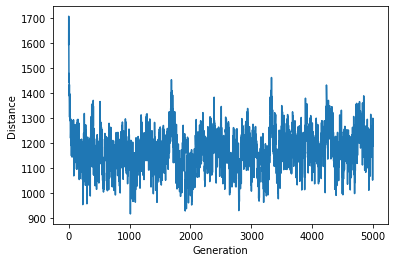

In [66]:
GeneticAlgorithm(cityList,50,0.1,5000)